## import moudle and algorithm

In [1]:
import random
import time
def merge_sort_find_optimal(arr):
    if len(arr) <= 1:
        return arr


    middle = len(arr) // 2
    left_half = arr[:middle]
    right_half = arr[middle:]

    left_half = merge_sort_find_optimal(left_half)
    right_half = merge_sort_find_optimal(right_half)


    return save_optimal(left_half, right_half)

def save_optimal(left, right):
    merged = []
    left_idx, right_idx = 0, 0

    while left_idx < len(left) and right_idx < len(right):
            # The left list is eligible and has a smaller x-value
        if left[left_idx][0] <= right[right_idx][0] and left[left_idx][1] >= right[right_idx][1]:
            merged.append(left[left_idx])
            left_idx += 1
            # The right list is eligible and has a smaller x-value
        elif left[left_idx][0] >= right[right_idx][0] and left[left_idx][1] <= right[right_idx][1]:
            merged.append(right[right_idx])
            right_idx += 1
            # The left side is not eligible, skip this element
        elif left[left_idx][0] < right[right_idx][0] and left[left_idx][1] < right[right_idx][1]:
            left_idx+=1
            # The right side is not eligible, skip this element
        elif left[left_idx][0] > right[right_idx][0] and left[left_idx][1] > right[right_idx][1]:
            right_idx+=1
    #Merge the remaining points
    merged.extend(left[left_idx:])
    merged.extend(right[right_idx:])

    return merged

def generate_random_points(n):
    points = []
    for _ in range(n):
        x = random.randint(0, 100)  # random x in [0,100]
        y = random.randint(0, 100)  # random y in [0,100]
        points.append((x, y))
    return points

## run the code with n=50

In [2]:
n = 50 # number of points
arr = generate_random_points(n)#generate random points for data normalization
start_time = time.perf_counter_ns()
sorted_arr = merge_sort_find_optimal(arr)
end_time = time.perf_counter_ns()
elapsed_time_ns = end_time - start_time
print(arr)
print(sorted_arr)
print(f"running time: {elapsed_time_ns} ns")

[(12, 78), (72, 28), (92, 96), (19, 39), (4, 7), (70, 37), (77, 78), (1, 32), (59, 83), (9, 78), (74, 63), (28, 72), (9, 30), (47, 28), (25, 99), (14, 23), (94, 57), (89, 42), (93, 85), (73, 62), (25, 36), (50, 5), (37, 29), (27, 98), (81, 1), (11, 23), (72, 26), (55, 43), (72, 10), (94, 47), (46, 1), (13, 19), (8, 60), (77, 68), (5, 49), (24, 85), (29, 99), (25, 43), (79, 2), (66, 11), (9, 100), (20, 3), (0, 14), (6, 8), (15, 57), (42, 96), (87, 67), (11, 68), (32, 60), (13, 47)]
[(9, 100), (25, 99), (29, 99), (42, 96), (92, 96), (93, 85), (94, 57), (94, 47)]
running time: 169200 ns


## show point graph

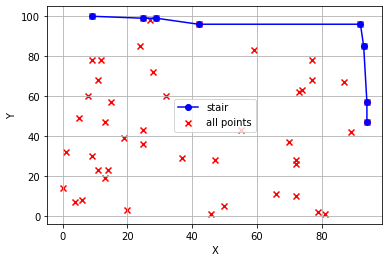

In [3]:
# show stair
import matplotlib.pyplot as plt

x_arr= [item[0] for item in arr]
y_arr= [item[1] for item in arr]
x_sorted_arr= [item[0] for item in sorted_arr]
y_sorted_arr= [item[1] for item in sorted_arr]

plt.plot(x_sorted_arr, y_sorted_arr, marker='o', linestyle='-', color='b', label='stair')
plt.scatter(x_arr, y_arr, marker='x', color='r', label='all points')

plt.xlabel('X')
plt.ylabel('Y')


plt.legend()

plt.grid(True)
plt.show()
